# Implement Grover's Algorithm in Qiskit

In [20]:
#import necessary libraries to work with
!pip install -U -r resources/requirements.txt
from IPython.display import clear_output
clear_output()

In [21]:
#Implement Grover's algorithm by creating a quantum circuit that has marked elements 000001 and 101010.
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
import numpy as np

# Phase oracle

In [22]:
def phase_oracle(n, indices_to_mark, name = 'Oracle'):
    # creating  quantum circuit on n qubits
    qc = QuantumCircuit(n, name=name)
    # creating the identity matrix on n qubits
    oracle_matrix = np.identity(2**n)
    # adding the -1 phase to marked elements
    for index_to_mark in indices_to_mark:
        oracle_matrix[index_to_mark, index_to_mark] = -1
    # converting the matrix (called oracle_matrix) into an operator, and add it to the quantum circuit
    qc.unitary(Operator(oracle_matrix), range(n))
    return qc

# Diffusion operator V

In [ ]:
 def diffuser(n):
    # create a quantum circuit on n qubits
    qc = QuantumCircuit(n, name='Diffuser')
    # applying hadamard gates to all qubits
    qc.h(range(n))
    # calling the phase oracle applied to the zero state
    qc.append(phase_oracle(n, [0]), range(n))
    # applying hadamard gates to all qubits
    qc.h(range(n))
    return qc

# Combine functions to construct Grover's Algorithm

In [24]:
def Grover(n, indices_of_marked_elements):
    # Creating a quantum circuit on n qubits
    qc = QuantumCircuit(n, n)
    # Determining r
    r = int(np.floor(np.pi/4*np.sqrt(2**n/len(indices_of_marked_elements))))
    print(f'{n} qubits, basis states {indices_of_marked_elements} marked, {r} rounds')
    # step 1: applying Hadamard gates on all qubits
    qc.h(range(n))
    # step 2: applying r rounds of the phase oracle and the diffuser
    for _ in range(r):
        qc.append(phase_oracle(n, indices_of_marked_elements), range(n))
        qc.append(diffuser(n), range(n))
 # step 3: measuring all qubits
    qc.measure(range(n), range(n))
    return qc
mycircuit = Grover(6, [1, 42])
mycircuit.draw()

6 qubits, basis states [1, 42] marked, 4 rounds


┌───┐┌─────────┐┌───────────┐┌─────────┐┌───────────┐┌─────────┐»
q_0: ┤ H ├┤0        ├┤0          ├┤0        ├┤0          ├┤0        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_1: ┤ H ├┤1        ├┤1          ├┤1        ├┤1          ├┤1        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_2: ┤ H ├┤2        ├┤2          ├┤2        ├┤2          ├┤2        ├»
     ├───┤│  Oracle ││  Diffuser ││  Oracle ││  Diffuser ││  Oracle │»
q_3: ┤ H ├┤3        ├┤3          ├┤3        ├┤3          ├┤3        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_4: ┤ H ├┤4        ├┤4          ├┤4        ├┤4          ├┤4        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_5: ┤ H ├┤5        ├┤5          ├┤5        ├┤5          ├┤5        ├»
     └───┘└─────────┘└───────────┘└─────────┘└───────────┘└─────────┘»
c: 6/════════════════════════════════════════════════════════════════»
                                                                     »
«     ┌───────────┐┌─────────┐┌───────────┐┌─┐               
«q_0: ┤0          ├┤0        ├┤0          ├┤M├───────────────
«     │           ││         ││           │└╥┘┌─┐            
«q_1: ┤1          ├┤1        ├┤1          ├─╫─┤M├────────────
«     │           ││         ││           │ ║ └╥┘┌─┐         
«q_2: ┤2          ├┤2        ├┤2          ├─╫──╫─┤M├─────────
«     │  Diffuser ││  Oracle ││  Diffuser │ ║  ║ └╥┘┌─┐      
«q_3: ┤3          ├┤3        ├┤3          ├─╫──╫──╫─┤M├──────
«     │           ││         ││           │ ║  ║  ║ └╥┘┌─┐   
«q_4: ┤4          ├┤4        ├┤4          ├─╫──╫──╫──╫─┤M├───
«     │           ││         ││           │ ║  ║  ║  ║ └╥┘┌─┐
«q_5: ┤5          ├┤5        ├┤5          ├─╫──╫──╫──╫──╫─┤M├
«     └───────────┘└─────────┘└───────────┘ ║  ║  ║  ║  ║ └╥┘
«c: 6/══════════════════════════════════════╩══╩══╩══╩══╩══╩═
«                                           0  1  2  3  4  5

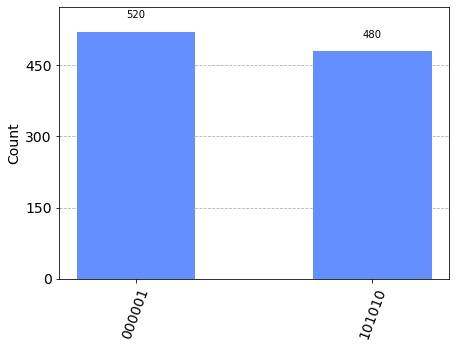

In [25]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
counts = execute(mycircuit, backend=simulator, shots=1000).result().get_counts(mycircuit)
from qiskit.visualization import plot_histogram
plot_histogram(counts)